In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train=pd.read_csv("./titanic/train.csv")
test=pd.read_csv("./titanic/test.csv")

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

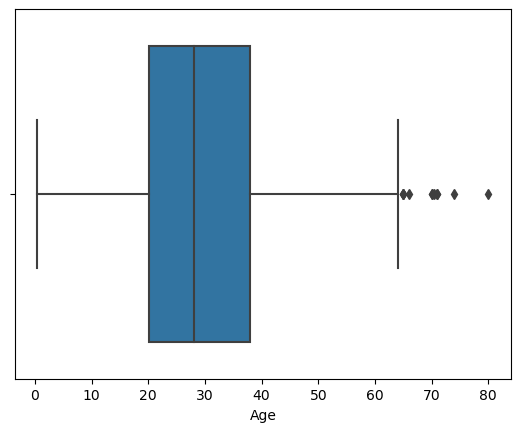

In [4]:
sns.boxplot(train["Age"])

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

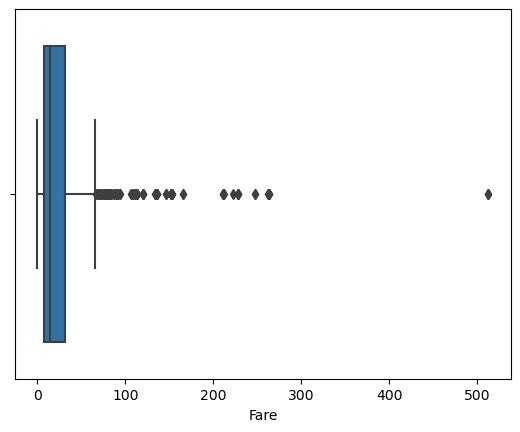

In [5]:
sns.boxplot(train["Fare"])

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

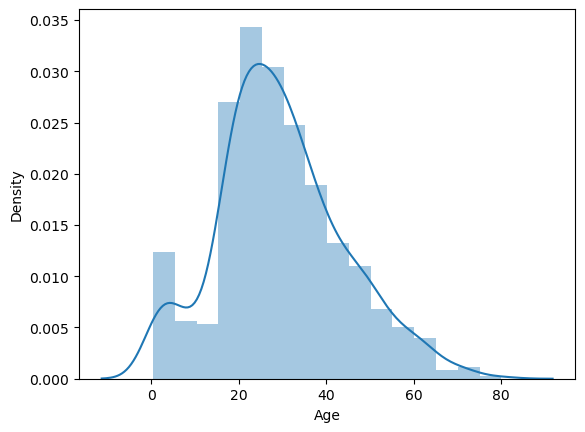

In [6]:
sns.distplot(train["Age"], bins = 16)

In [9]:
train["Age"].value_counts().tail(15)

0.42     1
0.67     1
66.00    1
24.50    1
80.00    1
20.50    1
53.00    1
14.50    1
70.50    1
12.00    1
36.50    1
55.50    1
0.92     1
23.50    1
74.00    1
Name: Age, dtype: int64

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


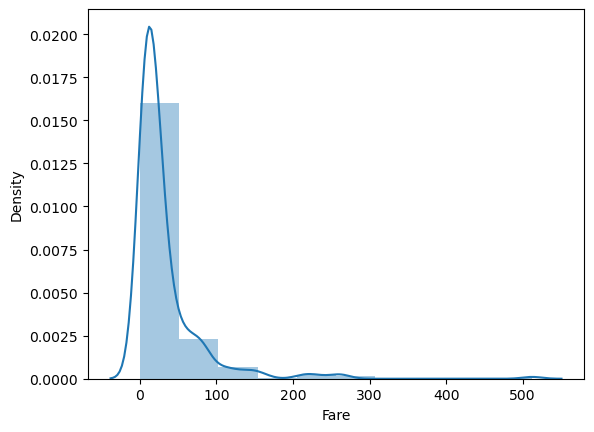

In [18]:
# 「運賃」列を深掘り
# 問題1
sns.distplot(train["Fare"], bins=10)
plt.show()

In [22]:
train["Fare"].value_counts(15)

8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: Fare, Length: 248, dtype: float64

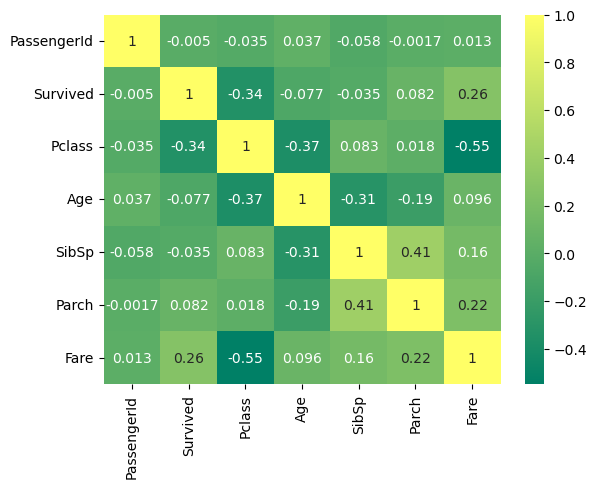

In [25]:
sns.heatmap(train.corr(), cmap = "summer", annot = True)
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


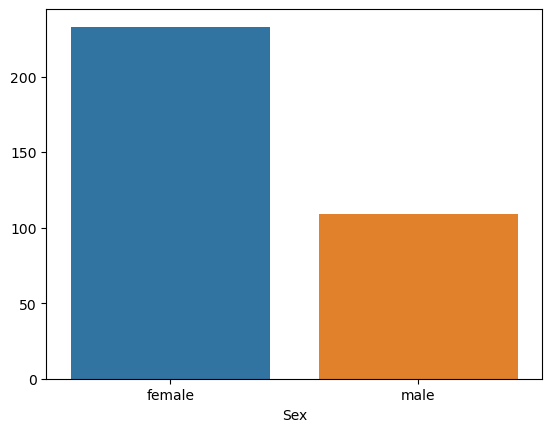

In [37]:
sum_survived = train.groupby(["Sex"])["Survived"].sum()
sns.barplot(sum_survived.keys(), sum_survived.values)
plt.show()

In [43]:
data_count = train.groupby(["Sex","Survived"])["Survived"].count()
sns.barplot(data_count.keys(), data_count.values)
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NotImplementedError: isna is not defined for MultiIndex

In [41]:
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [44]:
train.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [63]:
# 「乗船した港」と「生存」列の関係
# 問題1
embarked_data = train.groupby(["Embarked", "Survived"])["Survived"].count()
embarked_data

In [65]:
# 問題2
sns.barplot(embarked_data.keys(), embarked_data.values)
plt.show()

NotImplementedError: isna is not defined for MultiIndex

In [69]:
# 問題3
train.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [73]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
for df in [train, test]:
    df["Title"] = df["Name"].apply(get_title)
for df in [train, test]:
    
    # "Mlle","Ms","Mme" は Miss に置き換え
    df['Title'] =df['Title'].replace(["Mlle","Ms","Mme"],"Miss") 
    
    # それ以外はOthersへ
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')

In [74]:
train.Title.value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Others     23
Name: Title, dtype: int64

In [75]:
test.Title.value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

In [76]:
train.Embarked=train.Embarked.fillna("S")

In [77]:
train.groupby("Title")["Age"].mean()
for df in [train, test]:
    mean = df.groupby("Title")["Age"].mean()
    for title in mean.keys():
        df.loc[(df.Age.isnull())&(df.Title==title),"Age"] = mean[title]
#unique()は重複しない値をリストにして返すpandasの関数

In [78]:
test.Fare=test.Fare.fillna(test.Fare.median())

In [79]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [80]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [83]:
for df in [train, test]:
    df['Age_band'] = pd.cut(df["Age"], [0, 22, 30, 37, 59, 100], labels=range(5), right=False)
train['Age_band'].head()

0    1
1    3
2    1
3    2
4    2
Name: Age_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [86]:
for df in [train, test]:
    df['Fare_band'] = pd.cut(df["Fare"], [0, 8, 15, 31, 66, 520], labels = range(5), right=False)
train['Fare_band'].head()

0    0
1    4
2    0
3    3
4    1
Name: Fare_band, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


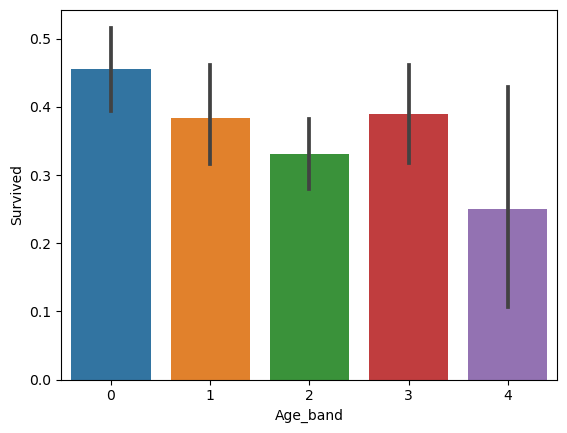

In [87]:
sns.barplot(train["Age_band"], train["Survived"])
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


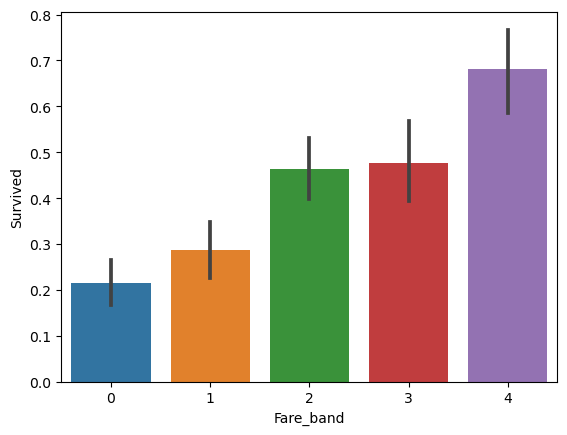

In [88]:
sns.barplot(train["Fare_band"], train["Survived"])
plt.show()

/Users/hiroya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


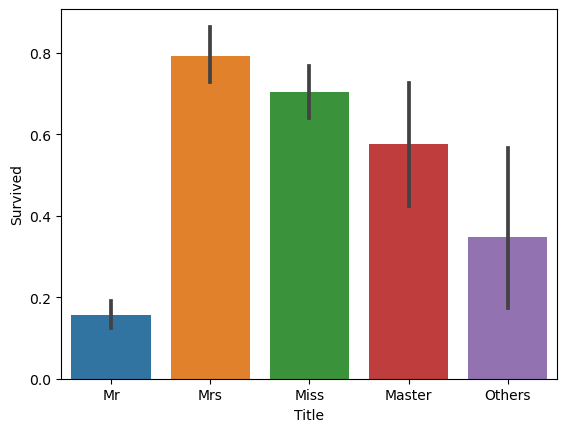

In [89]:
sns.barplot(train["Title"], train["Survived"])
plt.show()

In [90]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Age','Fare']
train = train.drop(drop_columns, axis = 1)
test  = test.drop(drop_columns, axis = 1)

In [91]:
for df in [train, test]:
    # 性別を数字でおきかえ
    df.loc[df['Sex']=="female", "Sex"]=0
    df.loc[df['Sex']=='male','Sex']=1
    
    # 敬称を数字で置き換え
    df.loc[df['Title']=='Mr', 'Title']=0
    df.loc[df['Title']=='Miss', 'Title']=1
    df.loc[df['Title']=='Mrs', 'Title']=2
    df.loc[df['Title']=='Master', 'Title']=3
    df.loc[df['Title']=='Others', 'Title']=4
    
    # 乗船した港３種類を数字でおきかえ
    df.loc[df['Embarked']=='S', 'Embarked']=0
    df.loc[df['Embarked']=='C', 'Embarked']=1
    df.loc[df['Embarked']=='Q', 'Embarked']=2

In [92]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [93]:
# pickle形式でデータを保存
# train
train.to_pickle("./titanic/titanic_train.pkl")

# test
test.to_pickle("./titanic/titanic_test.pkl")

In [94]:
#読み込むときは
train = pd.read_pickle("./titanic/titanic_train.pkl")
test = pd.read_pickle("./titanic/titanic_test.pkl")

In [97]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [98]:
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,3,1,0,0,2,0,2,0
1,3,0,1,0,0,2,3,0
2,2,1,0,0,2,0,4,1
3,3,1,0,0,0,0,1,1
4,3,0,1,1,0,2,1,1
